# Sensitivity analysis of population parameters

Initialising a random population None, size 1, with betas [100.0]
Betas for population None are [100.0]
Initialising a random population None, size 1, with betas [100.0]
Betas for population None are [100.0]
Initialising a random population None, size 1, with betas [100.0]
Betas for population None are [100.0]
Initialising a random population None, size 1, with betas [100.0]
Betas for population None are [100.0]
Initialising for key Tom_noise
Initialising a random population Tom_noise, size 5, with betas [5.89734032 2.06833764 8.53747661 7.33721953 9.12686299]
Betas for population Tom_noise are [5.89734032 2.06833764 8.53747661 7.33721953 9.12686299]
Elapsed time: 0.008948564529418945
Initialising for key Tom
Creating lagging time series population based on single event time series
The poisson rates for lagging population Tom are [27  1 15 20  3]
Initialising population Tom based on a prior object with event beta [100.0]
Mean lags for population Tom are [27  1 15 20  3]
Now combining p

C:\Users\owen\Machine learning projects\Luc_tweet project\src\poisson_processes.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cts=np.array([np.cumsum(t) for t in ts])


Analysis of tweet matrix 0: 20 time series length 1000
Analysis of tweet matrix 1: 0 time series length 1000
Running with inferred means.  Time elapsed: 0.41451406478881836
1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,Sample mean -0.2343450250710568, sample sigma 1.1151900981545582
Delta (max time-lag tested) is 31
     p-value  Z-score  name1  name2            id1            id2
74     0.075   -1.437  Elena  Elena  2424615328512  2424615328624
76     0.828    0.948  Elena  Elena  2424615328512  2424615328568
79     0.938    1.536  Elena  Elena  2424615328512  2424615328456
80     0.927    1.453  Elena  Elena  2424615328512  2424615328680
136    0.242   -0.700  Elena  Elena  2424615328624  2424615328568
139    0.621    0.308  Elena  Elena  2424615328624  2424615328456
140    0.596    0.242  Elena  Elena  2424615328624  2424615328680
156    0.550    0.125  Elena  Elena  2424615328568  2424615328456
157    0.022   -2.018  Elena  Elena  24246153285

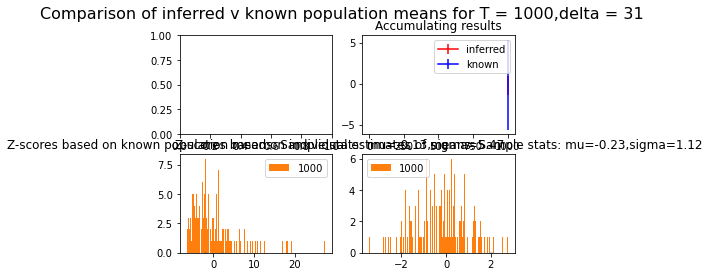

(<pointwise_correlation.tweet_data at 0x234868b5630>,
       T  Z score std dev (known means)  Z score mean (known means)  Z score std dev (inferred means)  Z score mean (inferred means)
 0  1000                          1.115                      -0.234                             5.471                         -0.134)

In [1]:
import testing_and_analysis_functions as analysis_func
import poisson_processes as pp
import pointwise_correlation as pc
import pandas as pd
import numpy as np

verbose=False
individuals_within_population_have_same_incidence=False
length = 1000
number_of_populations=4
size=5
max_lag=30
event_prob=0.01
noise_prob=0.2
interpret_as_max_values=False

if interpret_as_max_values:
    metaparams=analysis_func.create_random_metaparams(length=length,number_of_populations=number_of_populations,
                                                      max_size=size,max_lag=max_lag,max_event_prob=event_prob,max_noise_prob=noise_prob)
else:
    metaparams=analysis_func.create_fixed_metaparams(length=length,number_of_populations=number_of_populations,
                                                     size=size,lag=max_lag,event_prob=event_prob,noise_prob=noise_prob)

population_params=analysis_func.directly_initialise_multiple_populations(length=length,metaparams=metaparams,
                                                       use_fixed_means=individuals_within_population_have_same_incidence)

#Copy parameters to csv file in TEMP directory
pd.DataFrame.from_dict(metaparams,orient='index').to_csv("{0}\meta_params.csv".format(pc.TEMP_DIR))
df=pd.DataFrame.from_dict(population_params,orient='index')
df['prior process beta'] = df['prior poisson process'].apply(lambda x: None if type(x)==float else x.betas)
df['mean lag list']=df['lag parameters'].apply(lambda x: None if type(x)==float else x['mus'])
df=df.drop(['prior poisson process','lag parameters'],axis=1)
df.to_csv("{0}\population_parameters.csv".format(pc.TEMP_DIR))
    
    
    
mpp = pp.mixed_poisson_populations(length,population_params,verbose=verbose)
mpp.display(stats=True)
# mix populations and extract the full array of time_series_objects
ts_obj1=mpp.randomly_mix_populations(list(metaparams.keys()))
number=len(ts_obj1)   # total number of all time series in all populations        
ts_obj2=[] 
analysis_func.compare_inferred_and_known_means(xs=[length],number=number,ts_matrices=[ts_obj1,ts_obj2])